In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
%matplotlib inline

In [2]:
wine=pd.read_csv("winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# EDA

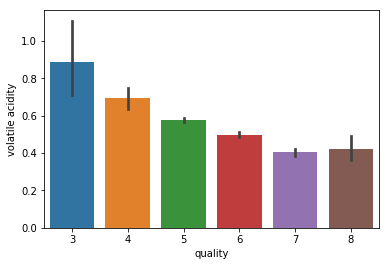

In [8]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

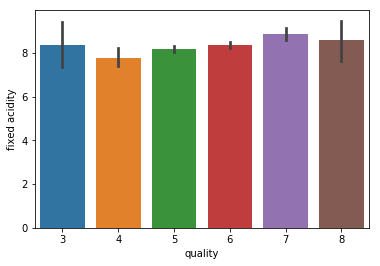

In [7]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

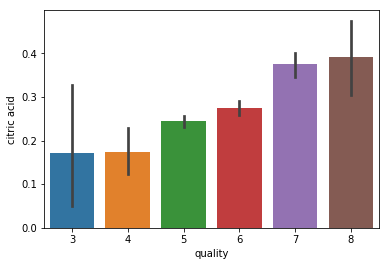

In [9]:
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

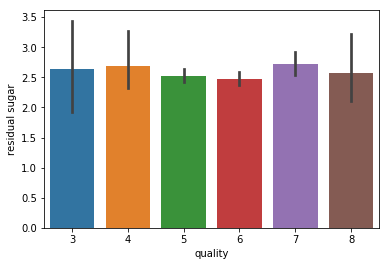

In [10]:
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

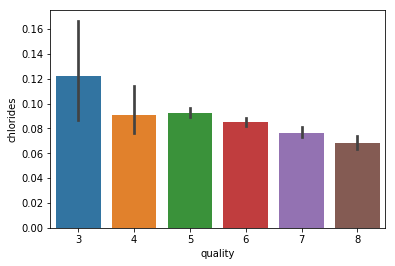

In [11]:
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

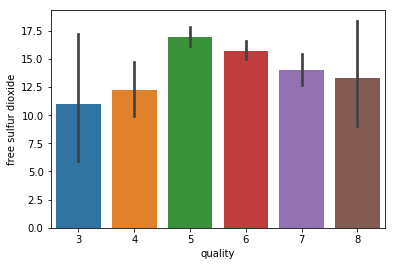

In [12]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

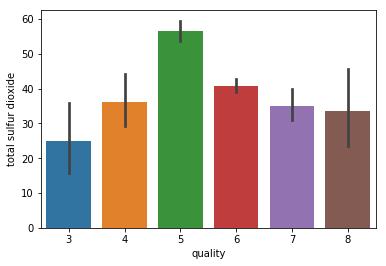

In [13]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

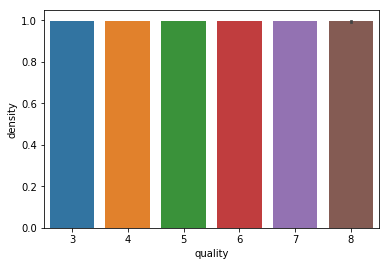

In [14]:
sns.barplot(x = 'quality', y = 'density', data = wine)

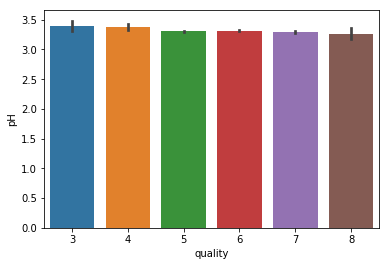

In [15]:
sns.barplot(x = 'quality', y = 'pH', data = wine)

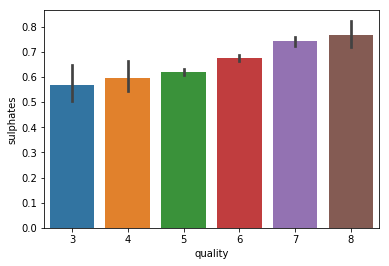

In [16]:
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

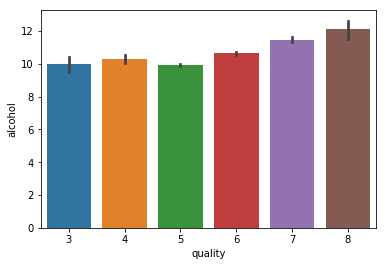

In [18]:
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [19]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [27]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [28]:
y_train.head()

493    6
354    6
342    6
834    5
705    5
Name: quality, dtype: int64

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
cnf=pd.DataFrame(lm.coef_,X_train.columns)
cnf

,0
fixed acidity,0.023085
volatile acidity,-1.001304
citric acid,-0.140821
residual sugar,0.006564
chlorides,-1.806503
free sulfur dioxide,0.005627
total sulfur dioxide,-0.003644
density,-10.351594
pH,-0.393688
sulphates,0.841172


In [42]:
predictions=lm.predict(X_test)

In [52]:
y_test.head()

803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64

In [44]:
predictions

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032,
       6.13959677, 5.23386892, 5.54991474, 5.25825299, 5.44810502,
       6.46828999, 5.15018088, 5.59105157, 6.5560658 , 5.32255751,
       5.3918385 , 5.19610791, 5.94475739, 6.36197631, 5.35484893,
       5.41907575, 6.36483321, 5.35121573, 5.172392  , 6.16987311,
       5.25263058, 5.50657406, 5.75422105, 5.39101712, 5.45331031,
       5.02757499, 6.16173243, 5.68661555, 5.6486077 , 6.165471  ,
       5.52872593, 5.24414488, 6.17724727, 5.16500868, 5.87598332,
       5.81317121, 6.41982782, 5.6059474 , 5.15232137, 5.55634632,
       5.16044852, 5.10449459, 5.58371721, 6.33425313, 4.95134985,
       4.98364804, 6.01041999, 5.40809804, 5.83802638, 5.2486897 ,
       5.60717482, 5.96630957, 5.27619063, 5.30380113, 6.4949309 ,
       5.42033967, 6.34273471, 5.24618531, 6.41317317, 5.31237924,
       6.41746963, 4.74315748, 5.79362039, 5.8283184 , 6.17598

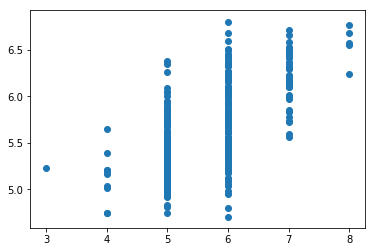

In [48]:
plt.scatter(y_test,predictions)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5035304415524374
MSE: 0.39002514396395416
RMSE: 0.6245199307980124


In [81]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        10
          5       0.57      0.70      0.63       130
          6       0.50      0.55      0.53       132
          7       0.50      0.17      0.25        42
          8       0.00      0.00      0.00         5

avg / total       0.50      0.53      0.50       320



D:\anacondaa\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier( max_depth=3)

In [86]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predict and Evaluate

In [87]:
predictions = dtree.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        10
          5       0.54      0.91      0.68       130
          6       0.53      0.31      0.39       132
          7       0.42      0.24      0.30        42
          8       0.00      0.00      0.00         5

avg / total       0.49      0.53      0.48       320



D:\anacondaa\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
print(confusion_matrix(y_test,predictions))

[[  0   0   1   0   0   0]
 [  0   0   8   2   0   0]
 [  0   0 118  11   1   0]
 [  0   0  82  41   9   0]
 [  0   0   9  23  10   0]
 [  0   0   0   1   4   0]]


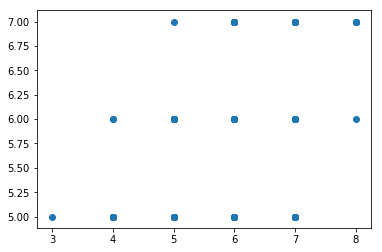

In [91]:
plt.scatter(y_test,predictions)

Tree Visualization


In [92]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(wine.columns[:-1])
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

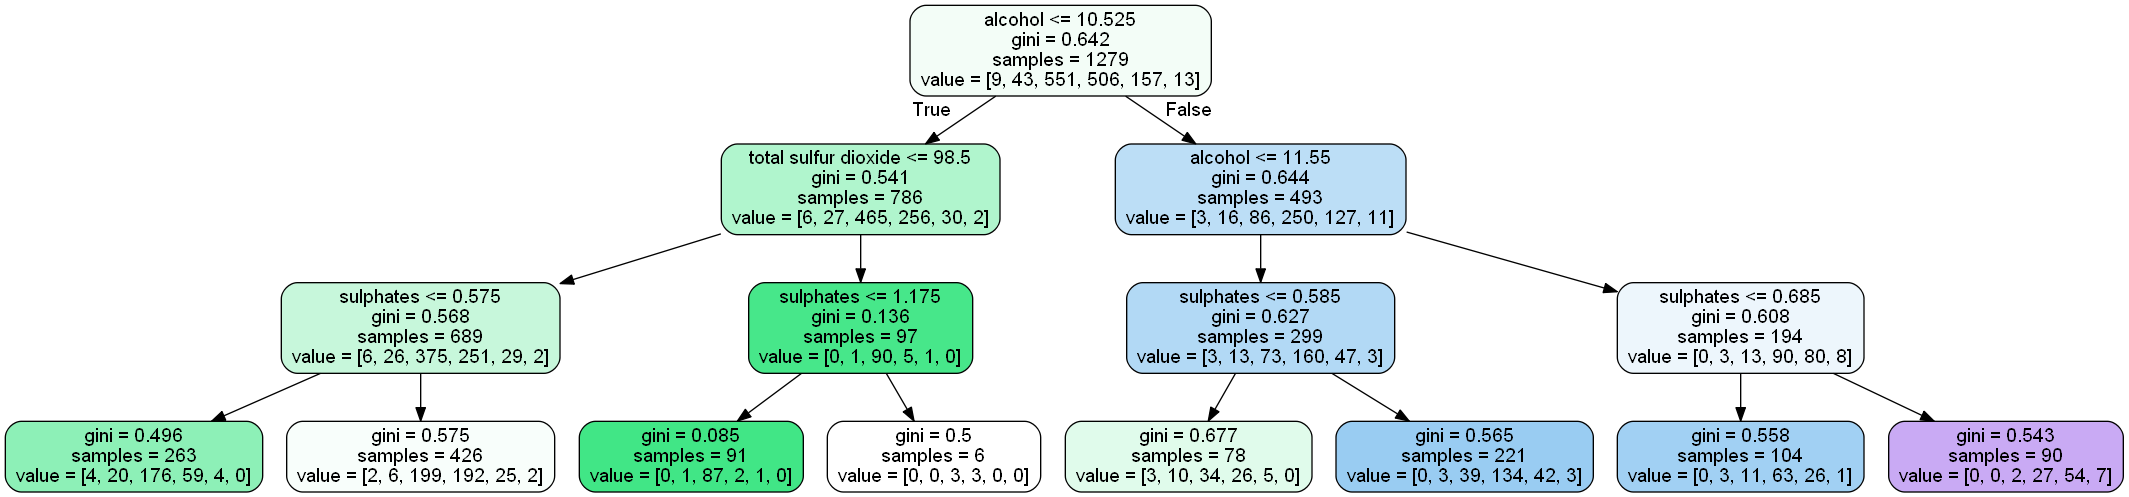

In [93]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png(),width=5000000,height=100)  

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestCssifier
rfc = RandomForestClassifier(n_laestimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
rfc_pred = rfc.predict(X_test)

In [73]:
print(confusion_matrix(y_test,rfc_pred))

[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 100  29   1   0]
 [  0   0  31  95   6   0]
 [  0   0   0  20  21   1]
 [  0   0   0   0   5   0]]


In [74]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        10
          5       0.72      0.77      0.75       130
          6       0.64      0.72      0.68       132
          7       0.64      0.50      0.56        42
          8       0.00      0.00      0.00         5

avg / total       0.64      0.68      0.66       320



D:\anacondaa\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


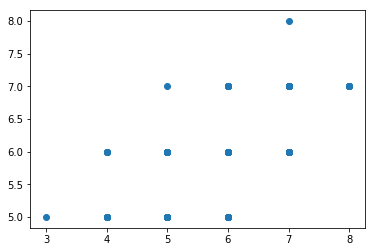

In [83]:
plt.scatter(y_test,rfc_pred)

# SVM

In [75]:
from sklearn.svm import SVC

In [76]:
model = SVC()

In [77]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
predictions = model.predict(X_test)

In [79]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        10
          5       0.57      0.70      0.63       130
          6       0.50      0.55      0.53       132
          7       0.50      0.17      0.25        42
          8       0.00      0.00      0.00         5

avg / total       0.50      0.53      0.50       320



D:\anacondaa\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
print(confusion_matrix(y_test,predictions))

[[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 91 38  1  0]
 [ 0  0 53 73  6  0]
 [ 0  0  8 27  7  0]
 [ 0  0  1  4  0  0]]


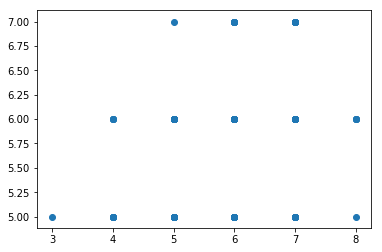

In [84]:
plt.scatter(y_test,predictions)